In [1]:
# Python classics
import numpy as np
import tensorly as tl
import mu_ntd.algorithms.Sparse_ntd as SNTD
import matplotlib.pyplot as plt

In [2]:
#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Data generation
#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
U_lines = 100
V_lines = 101
W_lines = 20
ranks = [4,6,5]
# Noise level
sigma = 1e-2
tol = 0 #running all iterations
# Generation of the input data tensor T
factors_0 = []
#factors_0.append(np.random.rand(U_lines, ranks[0]))
#factors_0.append(np.random.rand(V_lines, ranks[1]))
#factors_0.append(np.random.rand(W_lines, ranks[2]))
# sparse generation
W = np.random.randn(U_lines, ranks[0])
H = np.random.randn(V_lines, ranks[1])
Q = np.random.randn(W_lines, ranks[2])
W[W<0]=0
H[H<0]=0
Q[Q<0]=0
factors_0.append(W)
factors_0.append(H)
factors_0.append(Q)
core_0 = np.random.randn(ranks[0], ranks[1], ranks[2])
core_0[core_0<0]=0 #sparsifying the gt solution
factors_GT = factors_0
core_GT = core_0
T = tl.tenalg.multi_mode_dot(core_0, factors_0) + sigma * np.random.rand(U_lines, V_lines, W_lines) #1e-2

In [3]:
# Random initialization for the NTD
factors_init = []
factors_init.append(np.random.rand(U_lines, ranks[0]))
factors_init.append(np.random.rand(V_lines, ranks[1]))
factors_init.append(np.random.rand(W_lines, ranks[2]))
core_init = np.random.rand(ranks[0], ranks[1], ranks[2])

In [4]:
# Solver parameters
n_iter_max = 200
beta = 1
iter_inner = 5
l2weight = np.array([0, 0, 0, 1])  #(\mu_g, \mu_W, \mu_H, \mu_Q)
l1weight = np.array([1, 1, 1, 0])  #(\mu_g, \mu_W, \mu_H, \mu_Q)

In [5]:
    #------------------------------
    # Call of solvers
    #----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


    # ### Beta = 1 - MU no extrapolation
    core, factors, cost_fct_vals, toc, alpha = SNTD.sntd_mu(T, ranks, l2weights=l2weight, l1weights=l1weight, init = "custom", core_0 = core_init, factors_0 = factors_init, n_iter_max = n_iter_max, tol=tol, beta = beta,
                                                fixed_modes = [], normalize = 4*[None], verbose = False, return_costs = True, extrapolate=False, iter_inner=iter_inner)

100%|██████████| 200/200 [00:06<00:00, 29.83it/s]


In [6]:
    # ### Beta = 1 - MU extrapolation
    core_HER, factors_HER, cost_fct_vals_HER, toc_HER, alpha_HER = SNTD.sntd_mu(T, ranks, l2weights=l2weight, l1weights=l1weight, init = "custom", core_0 = core_init, factors_0 = factors_init, n_iter_max = n_iter_max, tol=tol, beta = beta,
                                                fixed_modes = [], normalize = 4*[None], verbose = False, return_costs = True, extrapolate=True, iter_inner=iter_inner)

100%|██████████| 200/200 [00:07<00:00, 28.37it/s]


In [7]:
    #----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Reporting
#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
print("-----------------------------------------------------------------------")
print("Reporting results:")
print("-----------------------------------------------------------------------")
print("Final loss function value:")
print(f"MU, Beta = 1       : {cost_fct_vals[-1]}, converged in {len(cost_fct_vals) - 1} iterations.")
print(f"MU - HER, Beta = 1 : {cost_fct_vals_HER[-1]}, converged in {len(cost_fct_vals_HER) - 1} iterations.")
print("-----------------------------------------------------------------------")
print("Final relative construction error:")
print(f"MU, Beta = 1       : {tl.norm(T-tl.tenalg.multi_mode_dot(core, factors))/tl.norm(T)*100} %")
print(f"MU - HER, Beta = 1 : {tl.norm(T-tl.tenalg.multi_mode_dot(core_HER, factors_HER))/tl.norm(T)*100} %")

-----------------------------------------------------------------------
Reporting results:
-----------------------------------------------------------------------
Final loss function value:
MU, Beta = 1       : 1334.6590807158232, converged in 200 iterations.
MU - HER, Beta = 1 : 1587.2519609508392, converged in 200 iterations.
-----------------------------------------------------------------------
Final relative construction error:
MU, Beta = 1       : 2.9512905157254092 %
MU - HER, Beta = 1 : 3.5003776350110303 %


In [8]:
tl.norm(core,order=2, axis=None)


9.96816050281507

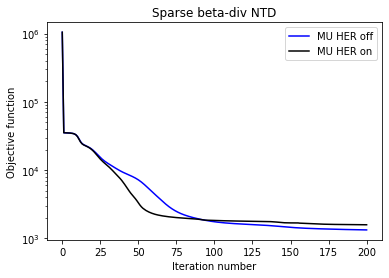

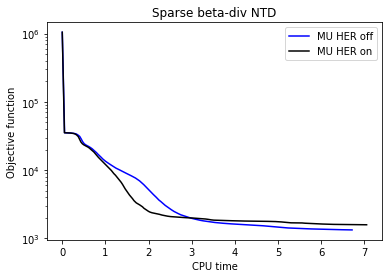

In [9]:
# first iteration shown?
it1 = 0

plt.figure(1)
plt.semilogy(cost_fct_vals[it1:], color='blue', label='MU HER off')
plt.semilogy(cost_fct_vals_HER[it1:], color='black', label='MU HER on')
plt.xlabel('Iteration number')
plt.ylabel('Objective function')
plt.title('Sparse beta-div NTD')
plt.legend()
plt.show()

plt.figure(2)
plt.semilogy(toc[it1:],cost_fct_vals[it1:], color='blue', label='MU HER off')
plt.semilogy(toc_HER[it1:],cost_fct_vals_HER[it1:], color='black', label='MU HER on')
plt.xlabel('CPU time')
plt.ylabel('Objective function')
plt.title('Sparse beta-div NTD')
plt.legend()
plt.show()